# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Python-implementation-of-the-Exponential-Integral-function" data-toc-modified-id="Python-implementation-of-the-Exponential-Integral-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python implementation of <a href="https://en.wikipedia.org/wiki/Exponential_integral" target="_blank">the Exponential Integral</a> function</a></div><div class="lev2 toc-item"><a href="#Two-implementations" data-toc-modified-id="Two-implementations-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Two implementations</a></div><div class="lev2 toc-item"><a href="#Checking-the-two-versions" data-toc-modified-id="Checking-the-two-versions-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking the two versions</a></div><div class="lev2 toc-item"><a href="#Special-values" data-toc-modified-id="Special-values-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Special values</a></div><div class="lev2 toc-item"><a href="#Plots" data-toc-modified-id="Plots-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plots</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></div>

# Python implementation of [the Exponential Integral](https://en.wikipedia.org/wiki/Exponential_integral) function

This small notebook is a [Python 3](https://www.python.org/) implementation of the Exponential Integral function, $Ei(x)$, defined like this:

$$ \forall x\in\mathbb{R}\setminus\{0\},\;\; \mathrm{Ei}(x) := \int_{-\infty}^x \frac{\mathrm{e}^u}{u} \; \mathrm{d}u. $$

In [48]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (19.80, 10.80)

In [49]:
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.4)

## Two implementations
As one can show mathematically, there is another equivalent definition (the one used on Wikipedia):

$$ \forall x\in\mathbb{R}\setminus\{0\},\;\; \mathrm{Ei}(x) := - \int_{-x}^{\infty} \frac{\mathrm{e}^{-t}}{t} \; \mathrm{d}t. $$

Numerically, we will avoid the issue in $0$ by integrating up-to $-\varepsilon$ instead of $0^-$ and from $\varepsilon$ instead of $0^+$, for a some small $\varepsilon$ (*e.g.*, $\varepsilon=10^{-6}$), and from $-M$ for a large value $M\in\mathbb{R}$ (*e.g.*, $M=1000$), instead of $-\infty$.

We use the [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function.

In [50]:
from scipy.integrate import quad  # need only 1 function

First definition is the simplest:

In [68]:
@np.vectorize
def Ei(x, minfloat=1e-6, maxfloat=1000):
    """Ei integral function."""
    def f(t):
        return np.exp(t) / t
    if x > 0:
        return (quad(f, -maxfloat, -minfloat)[0] + quad(f, minfloat, x)[0])
    else:
        return quad(f, -maxfloat, x)[0]

The other definition is very similar:

In [69]:
@np.vectorize
def Ei_2(x, minfloat=1e-6, maxfloat=1000):
    """Ei integral function."""
    def f(t):
        return np.exp(-t) / t
    if x > 0:
        return -1.0 * (quad(f, -x, -minfloat)[0] + quad(f, minfloat, maxfloat)[0])
    else:
        return -1.0 * quad(f, -x, maxfloat)[0]

## Checking the two versions
We can quickly check that the two are equal:

In [53]:
from numpy.linalg import norm

In [70]:
X = np.linspace(-1, 1, 1000)  # 1000 points
Y = Ei(X)
Y_2 = Ei_2(X)

In [71]:
assert np.allclose(Y, Y_2)
print(f"Two versions of Ei(x) are indeed equal for {len(X)} values.")

Two versions of Ei(x) are indeed equal for 1000 values.


We can compare which is fastest to evaluate:

In [72]:
%timeit Y = Ei(X)
%timeit Y_2 = Ei_2(X)

1.45 s ± 53.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.42 s ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


They both take about the same time, but the second implementation seems (slightly) faster.

## Special values
We can compute some special values, like $\mathrm{Ei}(1)$ and solving (numerically) $\mathrm{Ei}(x)=0$.

In [56]:
Ei(1)

1.8951158163559398

In [57]:
from scipy.optimize import root

In [58]:
res = root(Ei, x0=1)
res

    fjac: array([[-1.]])
     fun: 1.7763568394002505e-15
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.77999845e-12])
       r: array([-3.89621234])
  status: 1
 success: True
       x: array([0.37250792])

In [59]:
print(f"The approximate solution to Ei(x)=0 is x0 = {res.x[0]} (for which Ei(x)={res.fun})...")

The approximate solution to Ei(x)=0 is x0 = 0.37250792410018785 (for which Ei(x)=1.7763568394002505e-15)...


## Plots
And we can plot the $Ei(x)$ function, from $-1$ to $1$.

Text(0.5,1,'The function $Ei(x)$')

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

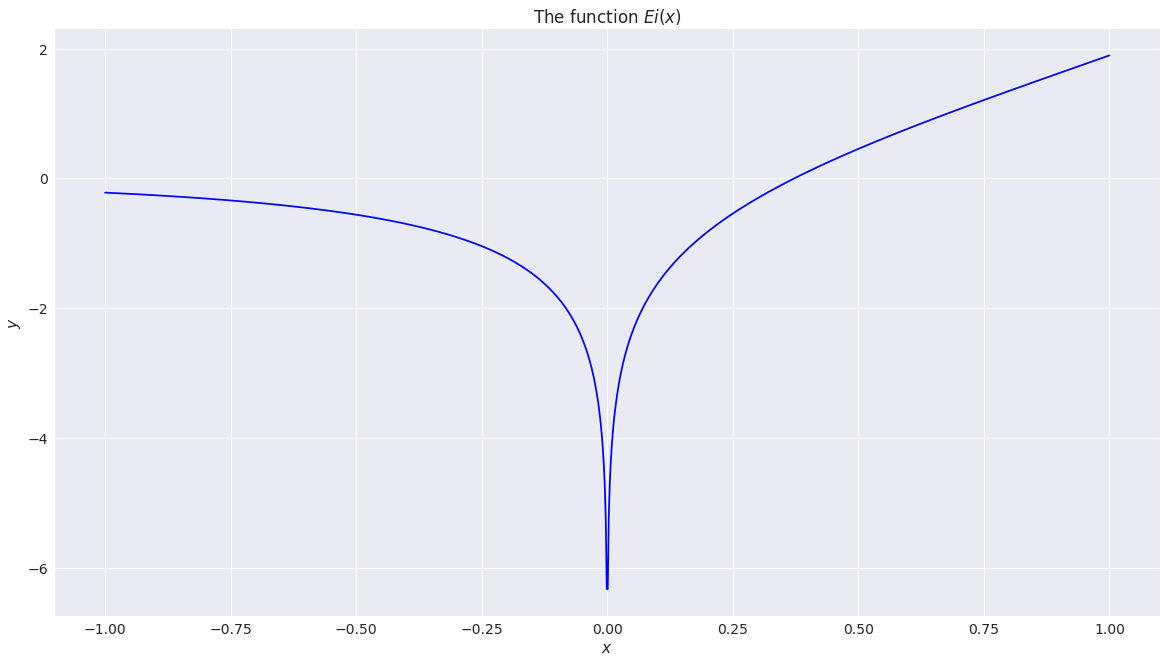

In [64]:
plt.plot(X, Y, 'b')
plt.title("The function $Ei(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Let's check that $\forall x\in\mathbb{R}, \mathrm{Ei}(x) \leq \mathrm{e}^x$:

Text(0.5,1,'The function $Ei(x)$ and upper-bound $e^x$')

Text(0.5,0,'$x$')

Text(0,0.5,'$y$')

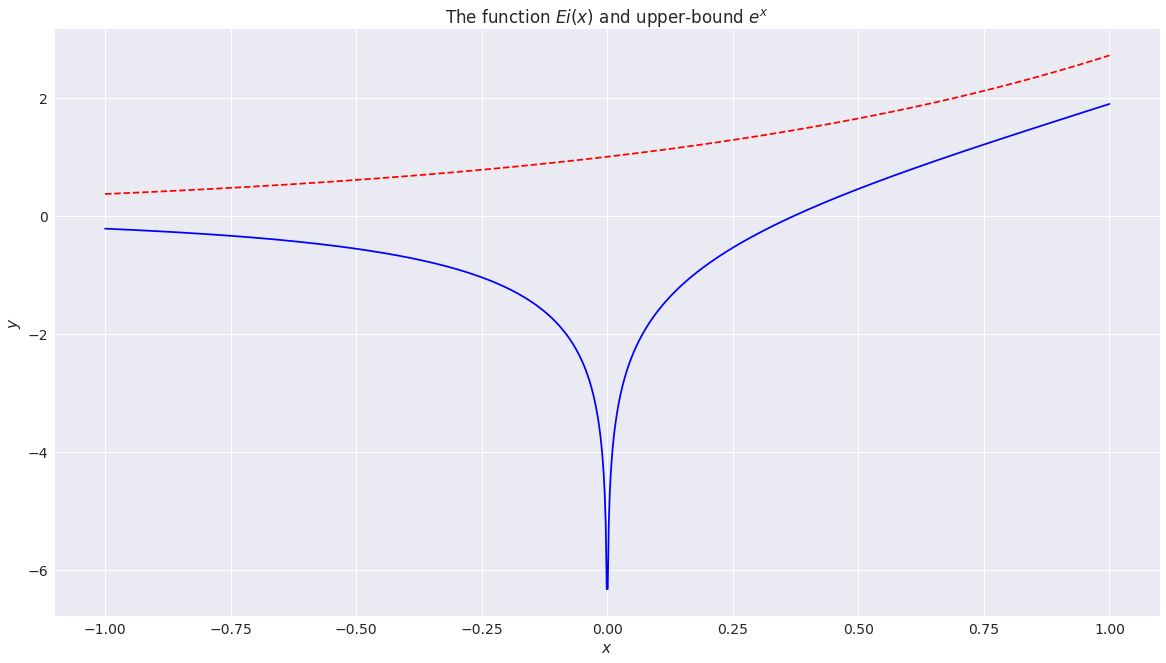

In [62]:
plt.plot(X, Y, 'b')
plt.plot(X, np.exp(X), 'r--')
plt.title("The function $Ei(x)$ and upper-bound $e^x$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [ ]:
X = np.linspace(1e-3, 10, 1000)  # 1000 points
Y = Ei(X)
plt.plot(X, Y, 'b')
# plt.plot(X, np.exp(X), 'r--')
plt.title("The function $Ei(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Conclusion

That's it, see [this page](https://en.wikipedia.org/wiki/Exponential_integral) or [this one](http://mathworld.wolfram.com/ExponentialIntegral.html) for more details on this function $\mathrm{Ei}(x)$.